<a href="https://colab.research.google.com/github/Ramkanc/Student_AI_ML/blob/main/RamV1_U4_MH1_Multi_class_weather_Transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Problem Statement

To identify and classify different types of weather using any open-source pre-trained models.

## Learning Objectives

At the end of this, you will be able to :

* Load and prepare the dataset
* Strengthen skills in the Transfer Learning area

In [1]:
#@title Mini-hackathon walkthrough
from IPython.display import HTML

HTML("""<video width="854" height="480" controls>
  <source src="https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/Walkthrough/B18_U4_MH_Walkthrough.mp4" type="video/mp4">
</video>
""")

## Dataset

Multi-class weather dataset(MWD) for image classification is a valuable dataset contains 1125 images divided into four folders such as sunrise, shine, rain, and cloudy.

## Grading = 10 Marks

## Setup Steps

In [2]:
#@title Run this cell to download the dataset

from IPython import get_ipython
import os
ipython = get_ipython()

notebook="U4_MH1_Multi-class weather_Transfer_learning" #name of the notebook
Answer = "This notebook is graded by mentors on the day of hackathon"
def setup():
#
   ipython.magic("sx wget http://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/Multi-classWeatherDataset.zip")
   ipython.magic("sx unzip -qq Multi-classWeatherDataset.zip")
   print ("Setup completed successfully")
   return

if(not os.path.exists('/content/Multi-classWeatherDataset.zip')):
  setup()
else:
  print ("Setup already exists")

Setup completed successfully


## Basic Pytorch packages

**torchvision:**  This package is used to load and prepare the dataset. Using this package we can perform/apply transformations on the input data.

**transforms:**  This package is  used to perform preprocessing on images and operations sequentially.

**nn:**  This package provides an easy and modular way to build and train simple or complex neural networks.

**optim:** This package is used for  implementing various optimization algorithms

In [3]:
# Import Libraries
import torch
import torchvision
from torch import nn
from torch import optim
import torch.nn.functional as F

from torchsummary import summary
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import ImageFolder

import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

## **Stage 1 :** Data Preparation

2 Marks -> Load the data and Split the data into Train and Test sets

1. Define the transformations
2. Prepare the dataset with the defined transformations
3. Split the data into train and test sets
4. Load the train and test data using dataloader

In [6]:
# 1) Define the transformations
# 2) Prepare the dataset with the defined transformations
# 3) Split the data into train and test sets
# 4) Load the train and test data using dataloader

# Define the transformations
data_transforms = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])


# Prepare the dataset with the defined transformations
data_dir = '/content/Multi-class Weather Dataset'

# Split the data into train and test sets
dataset = ImageFolder(data_dir, transform=data_transforms)

# Split the data into train and test sets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])


In [7]:
print(len(train_dataset))
print(len(test_dataset))

900
225


In [9]:
# YOUR CODE HERE for preparing and loading the data
# Load the train and test data using dataloader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

1 Marks -> Plot the first 10 images

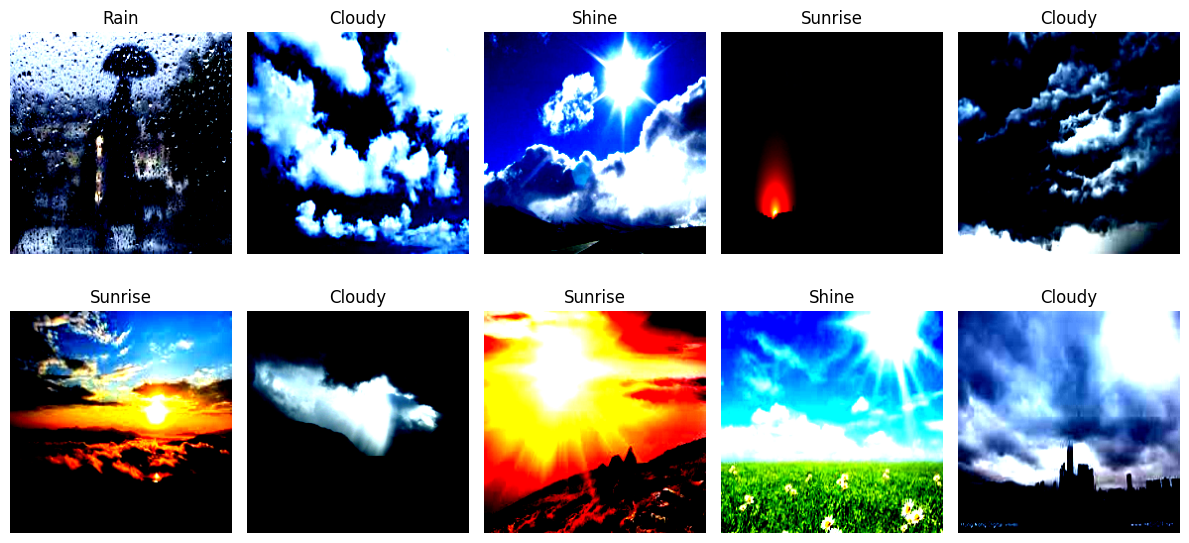

In [11]:
# Function to unnormalize and display an image
# YOUR CODE HERE for plotting the images
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get a batch of training data
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Display the first 10 images and their labels in 2 rows
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i in range(10):
    row = i // 5
    col = i % 5
    # Clip the image data to the valid range
    image = images[i].cpu().numpy()  # Move to CPU and convert to NumPy array
    image = np.clip(image, 0, 1)    # Clip values to 0-1 range
    # Transpose the image to (height, width, channels)
    image = np.transpose(image, (1, 2, 0))
    axes[row, col].imshow(image)
    axes[row, col].set_title(dataset.classes[labels[i]])
    axes[row, col].axis('off')
plt.tight_layout()
plt.show()

## **Stage2:** Build the Model

2 Marks -> Prepare the Model using any open-source pretrained model

1. Download a pre-trained model.
2. Fine tune or customize layers in the output to perform classification on a specific task.
3. Declare the loss function and optimizer
4. Print the summary of the model.

In [ ]:
# YOUR CODE HERE for preparing the model.

In [12]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [13]:
# 1) Download a pre-trained models.
# 2) Fine tune or customize layers in the output to perform classification on a specific task.

# ----------------------------------------------------
# ResNet18 Model
# ----------------------------------------------------
def resnet18_model(num_classes=4):
    # Load pre-trained ResNet18
    model = models.resnet18(pretrained=True)
    for param in model.parameters():
        param.requires_grad = False

    # Customize the last fully connected layer for 4 output classes
    model.fc = torch.nn.Linear(in_features=model.fc.in_features, out_features=num_classes)

    return model

In [15]:
# ----------------------------------------------------
# VGG16 Model
# ----------------------------------------------------
def vgg16_model(num_classes=4):
    # Load pre-trained VGG16
    model = models.vgg16(pretrained=True)
    for param in model.parameters():
        param.requires_grad = False

    # Customize the classifier for 4 output classes
    model.classifier[6] = torch.nn.Linear(in_features=4096, out_features=num_classes)

    return model

# ----------------------------------------------------
# AlexNet Model
# ----------------------------------------------------
def alexnet_model(num_classes=4):
    # Load pre-trained Inception v3
    model = models.alexnet(pretrained=True)
    for param in model.parameters():
        param.requires_grad = False

    # Customize the fully connected layer for 4 output classes
    num_ftrs = model.classifier[6].in_features
    model.classifier[6] = nn.Linear(num_ftrs, 4)
    #model.to(device)

    return model

In [16]:
# 3) Declare the loss function and optimizer
# 4) Print the summary of the model.

model_resnet = resnet18_model(num_classes=4)  # Choose your desired model
model_resnet = model_resnet.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_resnet.parameters(), lr=0.001)

# Print the summary
summary(model_resnet, input_size=(3, 224, 224))

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 173MB/s]


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

In [17]:
model_vgg16 = vgg16_model(num_classes=4)  # Choose your desired model
model_vgg16 = model_vgg16.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_vgg16.parameters(), lr=0.001)

# Print the summary
summary(model_vgg16, input_size=(3, 224, 224))

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:06<00:00, 83.9MB/s]


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

In [18]:
model_alexnet = alexnet_model(num_classes=4)  # Choose your desired model
model_alexnet = model_alexnet.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_alexnet.parameters(), lr=0.001)

# Print the summary
summary(model_alexnet, input_size=(3, 224, 224))

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 172MB/s]


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 55, 55]          23,296
              ReLU-2           [-1, 64, 55, 55]               0
         MaxPool2d-3           [-1, 64, 27, 27]               0
            Conv2d-4          [-1, 192, 27, 27]         307,392
              ReLU-5          [-1, 192, 27, 27]               0
         MaxPool2d-6          [-1, 192, 13, 13]               0
            Conv2d-7          [-1, 384, 13, 13]         663,936
              ReLU-8          [-1, 384, 13, 13]               0
            Conv2d-9          [-1, 256, 13, 13]         884,992
             ReLU-10          [-1, 256, 13, 13]               0
           Conv2d-11          [-1, 256, 13, 13]         590,080
             ReLU-12          [-1, 256, 13, 13]               0
        MaxPool2d-13            [-1, 256, 6, 6]               0
AdaptiveAvgPool2d-14            [-1, 25

## **Stage 3:** Train the Model

2 Marks -> Train the Model and validate it continuously to calculate the loss and accuracy for the train dataset across each epoch.

**Expected training accuracy is above 95%**

In [19]:
# YOUR CODE HERE

# Record loss and accuracy of the train dataset

In [21]:
# prompt: 1) Train the Model and validate it continuously to calculate the loss and accuracy for the train dataset across each epoch. 2) Record loss and accuracy of the train dataset
def train_model(model, criterion, optimizer, num_epochs):
  model = model.to(device)
  train_losses = []
  train_accuracies = []

  for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    for inputs, labels in train_loader:
      inputs = inputs.to(device)
      labels = labels.to(device)

      optimizer.zero_grad()

      outputs = model(inputs)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()

      running_loss += loss.item()
      _, predicted = torch.max(outputs.data, 1)
      total_predictions += labels.size(0)
      correct_predictions += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = correct_predictions / total_predictions

    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.2f}, Accuracy: {epoch_accuracy:.2f}')
    if epoch_loss <= .03 and epoch_accuracy  >= 90:
      break
  return model, train_losses, train_accuracies


In [22]:
resnet_resumed_model, resnet_train_losses, resnet_train_accuracies = train_model(model_resnet, criterion, optimizer, num_epochs=30)

Epoch [1/30], Loss: 1.58, Accuracy: 0.17
Epoch [2/30], Loss: 1.59, Accuracy: 0.17
Epoch [3/30], Loss: 1.57, Accuracy: 0.19
Epoch [4/30], Loss: 1.55, Accuracy: 0.21
Epoch [5/30], Loss: 1.58, Accuracy: 0.18
Epoch [6/30], Loss: 1.56, Accuracy: 0.18
Epoch [7/30], Loss: 1.56, Accuracy: 0.20
Epoch [8/30], Loss: 1.57, Accuracy: 0.18
Epoch [9/30], Loss: 1.57, Accuracy: 0.19
Epoch [10/30], Loss: 1.56, Accuracy: 0.20
Epoch [11/30], Loss: 1.58, Accuracy: 0.18
Epoch [12/30], Loss: 1.58, Accuracy: 0.18
Epoch [13/30], Loss: 1.57, Accuracy: 0.18
Epoch [14/30], Loss: 1.57, Accuracy: 0.18
Epoch [15/30], Loss: 1.58, Accuracy: 0.19
Epoch [16/30], Loss: 1.58, Accuracy: 0.19
Epoch [17/30], Loss: 1.58, Accuracy: 0.17
Epoch [18/30], Loss: 1.57, Accuracy: 0.19
Epoch [19/30], Loss: 1.56, Accuracy: 0.18
Epoch [20/30], Loss: 1.56, Accuracy: 0.19
Epoch [21/30], Loss: 1.56, Accuracy: 0.19
Epoch [22/30], Loss: 1.57, Accuracy: 0.18
Epoch [23/30], Loss: 1.55, Accuracy: 0.19
Epoch [24/30], Loss: 1.58, Accuracy: 0.17
E

In [23]:
vgg16_resumed_model, vgg16_train_losses, vgg16_train_accuracies = train_model(model_vgg16, criterion, optimizer, num_epochs=30)

Epoch [1/30], Loss: 1.44, Accuracy: 0.24
Epoch [2/30], Loss: 1.44, Accuracy: 0.25
Epoch [3/30], Loss: 1.45, Accuracy: 0.26
Epoch [4/30], Loss: 1.45, Accuracy: 0.23
Epoch [5/30], Loss: 1.44, Accuracy: 0.26
Epoch [6/30], Loss: 1.43, Accuracy: 0.24
Epoch [7/30], Loss: 1.44, Accuracy: 0.25
Epoch [8/30], Loss: 1.44, Accuracy: 0.24
Epoch [9/30], Loss: 1.44, Accuracy: 0.26
Epoch [10/30], Loss: 1.44, Accuracy: 0.25
Epoch [11/30], Loss: 1.45, Accuracy: 0.22
Epoch [12/30], Loss: 1.43, Accuracy: 0.25
Epoch [13/30], Loss: 1.43, Accuracy: 0.23
Epoch [14/30], Loss: 1.45, Accuracy: 0.25
Epoch [15/30], Loss: 1.46, Accuracy: 0.24
Epoch [16/30], Loss: 1.44, Accuracy: 0.25
Epoch [17/30], Loss: 1.44, Accuracy: 0.25
Epoch [18/30], Loss: 1.42, Accuracy: 0.27
Epoch [19/30], Loss: 1.48, Accuracy: 0.23
Epoch [20/30], Loss: 1.45, Accuracy: 0.24
Epoch [21/30], Loss: 1.43, Accuracy: 0.27
Epoch [22/30], Loss: 1.45, Accuracy: 0.25
Epoch [23/30], Loss: 1.45, Accuracy: 0.25
Epoch [24/30], Loss: 1.46, Accuracy: 0.24
E

In [24]:
alexnet_resumed_model, alexnet_train_losses, alexnet_train_accuracies = train_model(model_alexnet, criterion, optimizer, num_epochs=10)

Epoch [1/10], Loss: 0.34, Accuracy: 0.88
Epoch [2/10], Loss: 0.12, Accuracy: 0.96
Epoch [3/10], Loss: 0.09, Accuracy: 0.98
Epoch [4/10], Loss: 0.08, Accuracy: 0.98
Epoch [5/10], Loss: 0.07, Accuracy: 0.98
Epoch [6/10], Loss: 0.05, Accuracy: 0.99
Epoch [7/10], Loss: 0.07, Accuracy: 0.98
Epoch [8/10], Loss: 0.05, Accuracy: 0.98
Epoch [9/10], Loss: 0.04, Accuracy: 0.98
Epoch [10/10], Loss: 0.03, Accuracy: 0.99


## **Stage 4:** Evaluate the Model

2 Marks -> Evaluate the model for the test dataset and calculate the loss and accuracy.

**Expected performance of test evaluation is above 95%**

In [25]:
# model.eval()
# YOUR CODE HERE for calculating the accuracy
def evaluate_model(model, test_loader):
  model.eval()
  test_loss = 0.0
  correct_predictions = 0
  total_predictions = 0

  with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        test_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_predictions += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()

  test_loss = test_loss / len(test_loader)
  test_accuracy = correct_predictions / total_predictions

  print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')
  return test_loss, test_accuracy

In [26]:
resnet_test_loss, resnet_test_accuracy = evaluate_model(resnet_resumed_model, test_loader)

Test Loss: 1.6290, Test Accuracy: 0.1556


In [27]:
vgg16_test_loss, vgg16_test_accuracy = evaluate_model(vgg16_resumed_model, test_loader)

Test Loss: 1.3754, Test Accuracy: 0.2133


In [28]:
alexnet_test_loss, alexnet_test_accuracy = evaluate_model(alexnet_resumed_model, test_loader)

Test Loss: 0.0711, Test Accuracy: 0.9511


## **Stage 5:** Report your observations on any two open source pre-trained models

1 Marks -> Report your observations

In [ ]:
# YOUR TEXT HERE on your observations

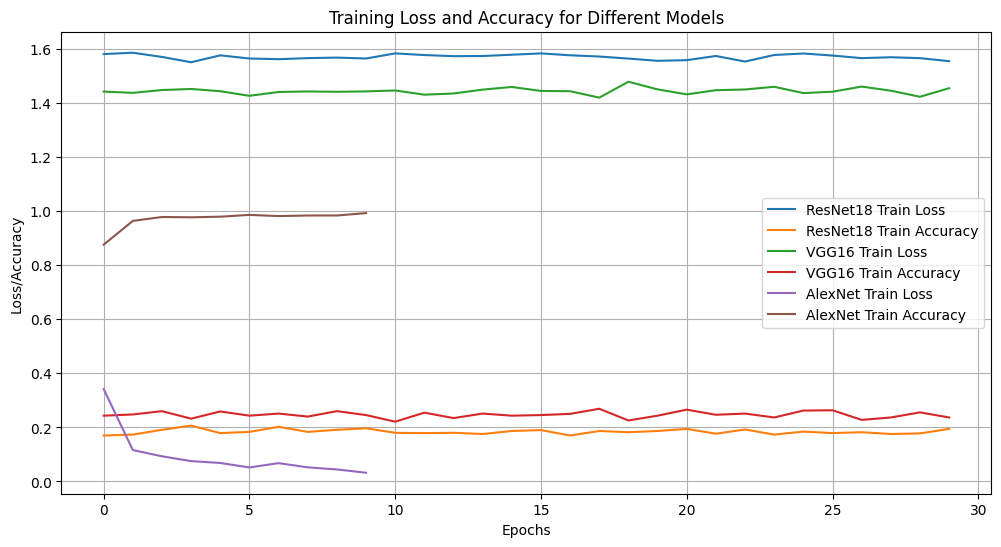

In [29]:
# plotting  resnet_train_losses, resnet_train_accuracies,vgg16_train_losses, vgg16_train_accuracies,alexnet_train_losses, alexnet_train_accuracies in single plot


plt.figure(figsize=(12, 6))

plt.plot(resnet_train_losses, label='ResNet18 Train Loss')
plt.plot(resnet_train_accuracies, label='ResNet18 Train Accuracy')
plt.plot(vgg16_train_losses, label='VGG16 Train Loss')
plt.plot(vgg16_train_accuracies, label='VGG16 Train Accuracy')
plt.plot(alexnet_train_losses, label='AlexNet Train Loss')
plt.plot(alexnet_train_accuracies, label='AlexNet Train Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.title('Training Loss and Accuracy for Different Models')
plt.legend()
plt.grid(True)
plt.show()


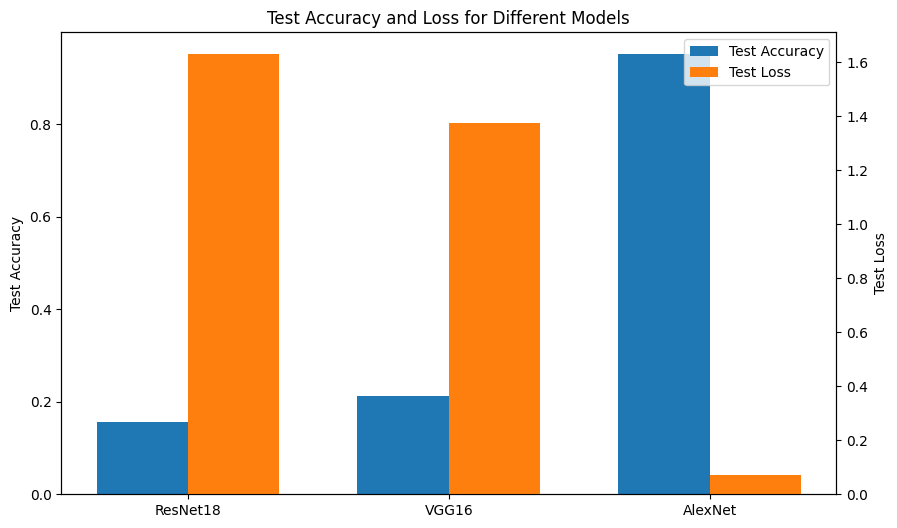

In [33]:
# plot  test accuracies and test losses in one consolidated bar chart

# Data for the bar chart
models = ['ResNet18', 'VGG16', 'AlexNet']
test_accuracies = [resnet_test_accuracy, vgg16_test_accuracy, alexnet_test_accuracy]
test_losses = [resnet_test_loss, vgg16_test_loss, alexnet_test_loss]

# Set the width of the bars
bar_width = 0.35

# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Create the bars for test accuracy
x = np.arange(len(models))
rects1 = ax1.bar(x - bar_width/2, test_accuracies, bar_width, label='Test Accuracy')
ax1.set_ylabel('Test Accuracy')

# Create the second y-axis for test loss
ax2 = ax1.twinx()
rects2 = ax2.bar(x + bar_width/2, test_losses, bar_width, color='C1', label='Test Loss')
ax2.set_ylabel('Test Loss')

# Set the x-axis labels
ax1.set_xticks(x)
ax1.set_xticklabels(models)

# Add a legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

# Add labels and title
plt.title('Test Accuracy and Loss for Different Models')

# Show the plot
plt.show()
